In [1]:
# import libraries 
import tensorflow
from tensorflow import keras
import numpy as np
import pandas as pd

In [2]:
train_images = r"C:\Users\ADmin\Downloads\Face Images\Face Images\Final Training Images"

## Image Preprocessing using keras


# As we know deep-learning is hungry for data, the data we have is only limited. 
# so lets perform **Image Agumentation** to create different versions
# of the original image, which leads to a better model, since it learns
# on the good and bad mix of images.

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
# No transformations are made on the test data
test_gen = ImageDataGenerator()

# Generating training data
training_data = train_gen.flow_from_directory(
    train_images, 
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'categorical'
)

# generating test data
testing_data = test_gen.flow_from_directory(
    train_images, 
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'categorical'
)

# Printing class labels for each face
testing_data.class_indices

Found 254 images belonging to 17 classes.
Found 254 images belonging to 17 classes.


{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face17': 8,
 'face2': 9,
 'face3': 10,
 'face4': 11,
 'face5': 12,
 'face6': 13,
 'face7': 14,
 'face8': 15,
 'face9': 16}

In [3]:
# training_data have numeric tag for each face
Train_class = training_data.class_indices

# lets store them in a dictionary with swap for future reference
Result_class = {}
for value_tag, face_tag in zip(Train_class.values(),Train_class.keys()):
    Result_class[value_tag] = face_tag

    
# use pickle to save the mapping's
import pickle
with open(r'C:\Users\ADmin\Downloads\Face Images\Face Images\ResultMap.pkl','wb') as Final_mapping:
    pickle.dump(Result_class,Final_mapping)

In [6]:
print("Mapping of Face and its numeric value",Result_class)

Mapping of Face and its numeric value {0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face17', 9: 'face2', 10: 'face3', 11: 'face4', 12: 'face5', 13: 'face6', 14: 'face7', 15: 'face8', 16: 'face9'}


In [8]:
Output_Neurons=len(Result_class)
print('\n The Number of output neurons: ', Output_Neurons)



 The Number of output neurons:  17


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [10]:
'''Initializing the Convolutional Neural Network'''
Model = Sequential()


Model.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), input_shape = (100,100,3),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Conv2D(32,kernel_size=(3,3),strides=(1,1),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Flatten())
Model.add(Dense(64,activation='relu'))
Model.add(Dense(Output_Neurons,activation='softmax'))


Model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['Accuracy'])



from keras.callbacks import EarlyStopping
call = EarlyStopping(
                    min_delta=0.005,
                    patience=5,
                     verbose=1
                    )

import time
# Measuring the time taken by the model to train
StartTime=time.time()

'''# Model Training'''
Model.fit(training_data,
          epochs = 30,
          validation_data=testing_data,
                   callbacks=call)

Endtime = time.time()
print('Total Training Time taken: ',round((Endtime-StartTime)/60),'Minutes')

c:\Users\ADmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/30


c:\Users\ADmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - Accuracy: 0.0541 - loss: 211.3182 - val_Accuracy: 0.0551 - val_loss: 62.4541
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - Accuracy: 0.0922 - loss: 37.9584 - val_Accuracy: 0.1575 - val_loss: 4.4726
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - Accuracy: 0.1777 - loss: 3.6218 - val_Accuracy: 0.5197 - val_loss: 1.7436
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - Accuracy: 0.5105 - loss: 1.8284 - val_Accuracy: 0.6811 - val_loss: 1.2497
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - Accuracy: 0.6382 - loss: 1.3719 - val_Accuracy: 0.8346 - val_loss: 0.5858
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - Accuracy: 0.7721 - loss: 0.7367 - val_Accuracy: 0.8858 - val_loss: 0.3822
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - Accuracy: 0.7850 - loss: 0.5871 - val_Accuracy: 0.9567 - val_loss: 0.1763
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - Accuracy: 0.9407 - loss: 0.2668 - val_Accuracy: 0.9606 - val_loss: 0.1103
Epoch 9

In [11]:
import numpy as np
from keras.preprocessing import image
import os
import glob

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [13]:

# Code to get evaluation metrics
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Function to load and preprocess images
def load_images(img_paths):
    images = []
    labels = []
    for path in img_paths:
        img = image.load_img(path, target_size=(100, 100))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        images.append(img)
        label = os.path.basename(os.path.dirname(path))  # Assuming folder name is the label
        labels.append(label)
    return np.vstack(images), labels

# Load test images
main_ = r"C:\Users\ADmin\Downloads\Face Images\Face Images\Final Testing Images"
img_paths = glob.glob(os.path.join(main_, '**', '*.jpg'))
test_images, true_labels = load_images(img_paths)

# Encode labels (assuming you have a list of class names)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)

# Make predictions
predictions = Model.predict(test_images, verbose=0)
predicted_labels = np.argmax(predictions, axis=1)

# Decode predicted labels
predicted_labels_decoded = label_encoder.inverse_transform(predicted_labels)

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels_encoded, predicted_labels)
precision = precision_score(true_labels_encoded, predicted_labels, average='weighted')
recall = recall_score(true_labels_encoded, predicted_labels, average='weighted')
f1 = f1_score(true_labels_encoded, predicted_labels, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print classification report
print('\nClassification Report:')
print(classification_report(true_labels_encoded, predicted_labels, target_names=label_encoder.classes_))

# Print confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(true_labels_encoded, predicted_labels))

Accuracy: 0.9324
Precision: 0.9495
Recall: 0.9324
F1 Score: 0.9343

Classification Report:
              precision    recall  f1-score   support

       face1       0.60      0.75      0.67         4
      face10       1.00      1.00      1.00         4
      face11       1.00      1.00      1.00         4
      face12       1.00      0.75      0.86         4
      face13       0.67      1.00      0.80         4
      face14       1.00      0.75      0.86         4
      face15       1.00      1.00      1.00         4
      face16       1.00      1.00      1.00         4
      face17       1.00      1.00      1.00        10
       face2       1.00      1.00      1.00         4
       face3       1.00      1.00      1.00         4
       face4       1.00      1.00      1.00         4
       face5       1.00      1.00      1.00         4
       face6       1.00      1.00      1.00         4
       face7       1.00      0.75      0.86         4
       face8       1.00      0.75      0.86 

In [ ]:
#Inceptionv3 Googlenet

In [28]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load ResNet50 model without the top layer
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Build model on top of ResNet50
model_resnet = Sequential()
model_resnet.add(base_model_resnet)
model_resnet.add(Flatten())
model_resnet.add(Dense(256, activation='relu'))
model_resnet.add(Dense(Output_Neurons, activation='softmax'))

# Compile the model
model_resnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_resnet.fit(training_data,
          epochs=30,
          validation_data=testing_data,
          callbacks=call)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 23s 0us/step
Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2942 - loss: 6.5216 - val_accuracy: 0.0669 - val_loss: 275.7571
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7733 - loss: 2.1714 - val_accuracy: 0.0591 - val_loss: 213179.0938
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.7306 - loss: 2.3903 - val_accuracy: 0.0591 - val_loss: 135362.4844
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7964 - loss: 3.7248 - val_accuracy: 0.0591 - val_loss: 8335.9189
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8720 - loss: 0.8901 - val_accuracy: 0.0787 - val_loss: 42268.1680
Epoch 5: early stopping


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Function to load and preprocess images
def load_images(img_paths):
    images = []
    labels = []
    for path in img_paths:
        img = image.load_img(path, target_size=(100, 100))
        img = image.img_to_array(img)
        img = img / 255.0  # Normalize image
        img = np.expand_dims(img, axis=0)
        images.append(img)
        label = os.path.basename(os.path.dirname(path))  # Assuming folder name is the label
        labels.append(label)
    return np.vstack(images), labels

# Load test images
main_ = r"C:\Users\ADmin\Downloads\Face Images\Face Images\Final Testing Images"
img_paths = glob.glob(os.path.join(main_, '**', '*.jpg'))
test_images, true_labels = load_images(img_paths)

# Encode labels
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)

# Make predictions
predictions_resnet = model_resnet.predict(test_images, verbose=0)
predicted_labels_resnet = np.argmax(predictions_resnet, axis=1)

# Decode predicted labels
predicted_labels_decoded_resnet = label_encoder.inverse_transform(predicted_labels_resnet)

# Calculate evaluation metrics
accuracy_resnet = accuracy_score(true_labels_encoded, predicted_labels_resnet)
precision_resnet = precision_score(true_labels_encoded, predicted_labels_resnet, average='weighted')
recall_resnet = recall_score(true_labels_encoded, predicted_labels_resnet, average='weighted')
f1_resnet = f1_score(true_labels_encoded, predicted_labels_resnet, average='weighted')

# Print evaluation metrics
print(f'Accuracy (ResNet50): {accuracy_resnet:.4f}')
print(f'Precision (ResNet50): {precision_resnet:.4f}')
print(f'Recall (ResNet50): {recall_resnet:.4f}')
print(f'F1 Score (ResNet50): {f1_resnet:.4f}')

# Print classification report
print('\nClassification Report (ResNet50):')
print(classification_report(true_labels_encoded, predicted_labels_resnet, target_names=label_encoder.classes_))

# Print confusion matrix
print('\nConfusion Matrix (ResNet50):')
print(confusion_matrix(true_labels_encoded, predicted_labels_resnet))


Accuracy (ResNet50): 0.0541
Precision (ResNet50): 0.0029
Recall (ResNet50): 0.0541
F1 Score (ResNet50): 0.0055

Classification Report (ResNet50):
              precision    recall  f1-score   support

       face1       0.00      0.00      0.00         4
      face10       0.05      1.00      0.10         4
      face11       0.00      0.00      0.00         4
      face12       0.00      0.00      0.00         4
      face13       0.00      0.00      0.00         4
      face14       0.00      0.00      0.00         4
      face15       0.00      0.00      0.00         4
      face16       0.00      0.00      0.00         4
      face17       0.00      0.00      0.00        10
       face2       0.00      0.00      0.00         4
       face3       0.00      0.00      0.00         4
       face4       0.00      0.00      0.00         4
       face5       0.00      0.00      0.00         4
       face6       0.00      0.00      0.00         4
       face7       0.00      0.00      0.00

c:\Users\ADmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [20]:
# from skimage.feature import hog
# from sklearn import svm
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# import cv2
# import os
# import glob

# # Function to extract HOG features
# def extract_hog_features(img_paths):
#     features = []
#     labels = []
#     for path in img_paths:
#         img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#         img = cv2.resize(img, (100, 100))
#         hog_features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
#         features.append(hog_features)
#         label = os.path.basename(os.path.dirname(path))
#         labels.append(label)
#     return features, labels

# # Load and preprocess images
# main_ = r"C:\Users\ADmin\Downloads\Face Images\Face Images\Final Testing Images"
# img_paths = glob.glob(os.path.join(main_, '**', '*.jpg'))
# features, true_labels = extract_hog_features(img_paths)

# # Encode labels
# label_encoder = LabelEncoder()
# true_labels_encoded = label_encoder.fit_transform(true_labels)

# # Train SVM
# clf = svm.SVC(kernel='linear', probability=True)
# clf.fit(features, true_labels_encoded)

# # Make predictions
# predicted_labels = clf.predict(features)

# # Calculate evaluation metrics
# accuracy1 = accuracy_score(true_labels_encoded, predicted_labels)
# precision1 = precision_score(true_labels_encoded, predicted_labels, average='weighted')
# recall1 = recall_score(true_labels_encoded, predicted_labels, average='weighted')
# f11= f1_score(true_labels_encoded, predicted_labels, average='weighted')

# # Print evaluation metrics
# print(f'Accuracy: {accuracy1:.4f}')
# print(f'Precision: {precision1:.4f}')
# print(f'Recall: {recall1:.4f}')
# print(f'F1 Score: {f11:.4f}')

# # Print classification report
# print('\nClassification Report:')
# print(classification_report(true_labels_encoded, predicted_labels, target_names=label_encoder.classes_))

# # Print confusion matrix
# print('\nConfusion Matrix:')
# print(confusion_matrix(true_labels_encoded, predicted_labels))


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

       face1       1.00      1.00      1.00         4
      face10       1.00      1.00      1.00         4
      face11       1.00      1.00      1.00         4
      face12       1.00      1.00      1.00         4
      face13       1.00      1.00      1.00         4
      face14       1.00      1.00      1.00         4
      face15       1.00      1.00      1.00         4
      face16       1.00      1.00      1.00         4
      face17       1.00      1.00      1.00        10
       face2       1.00      1.00      1.00         4
       face3       1.00      1.00      1.00         4
       face4       1.00      1.00      1.00         4
       face5       1.00      1.00      1.00         4
       face6       1.00      1.00      1.00         4
       face7       1.00      1.00      1.00         4
       face8       1.00      1.00      1.00 

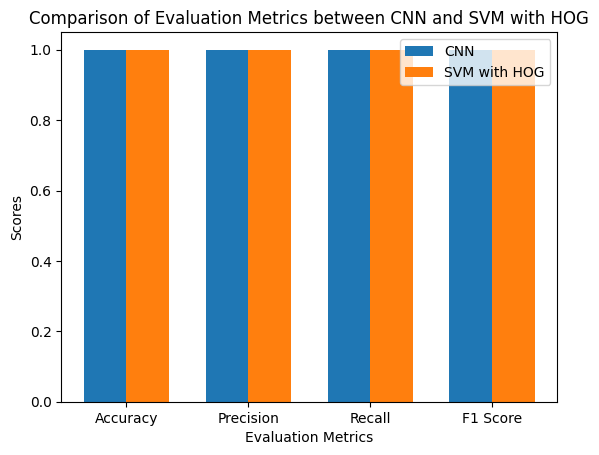

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the following variables hold the evaluation metrics for the models
# CNN metrics
accuracy_cnn = accuracy
precision_cnn = precision
recall_cnn = recall
f1_cnn = f1

# SVM with HOG metrics (values obtained from previous tuning code)
accuracy_svm_hog = accuracy1
precision_svm_hog = precision1
recall_svm_hog = recall1
f1_svm_hog = f11

# Metrics to compare
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
cnn_metrics = [accuracy_cnn, precision_cnn, recall_cnn, f1_cnn]
svm_hog_metrics = [accuracy_svm_hog, precision_svm_hog, recall_svm_hog, f1_svm_hog]

# Set up the bar width and positions
bar_width = 0.35
index = np.arange(len(metrics))

# Create a bar plot
fig, ax = plt.subplots()
bar1 = ax.bar(index, cnn_metrics, bar_width, label='CNN')
bar2 = ax.bar(index + bar_width, svm_hog_metrics, bar_width, label='SVM with HOG')

# Adding labels, title, and legend
ax.set_xlabel('Evaluation Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Evaluation Metrics between CNN and SVM with HOG')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Display the plot
plt.show()
